In [62]:
import fft_interp_wrappers as wrap

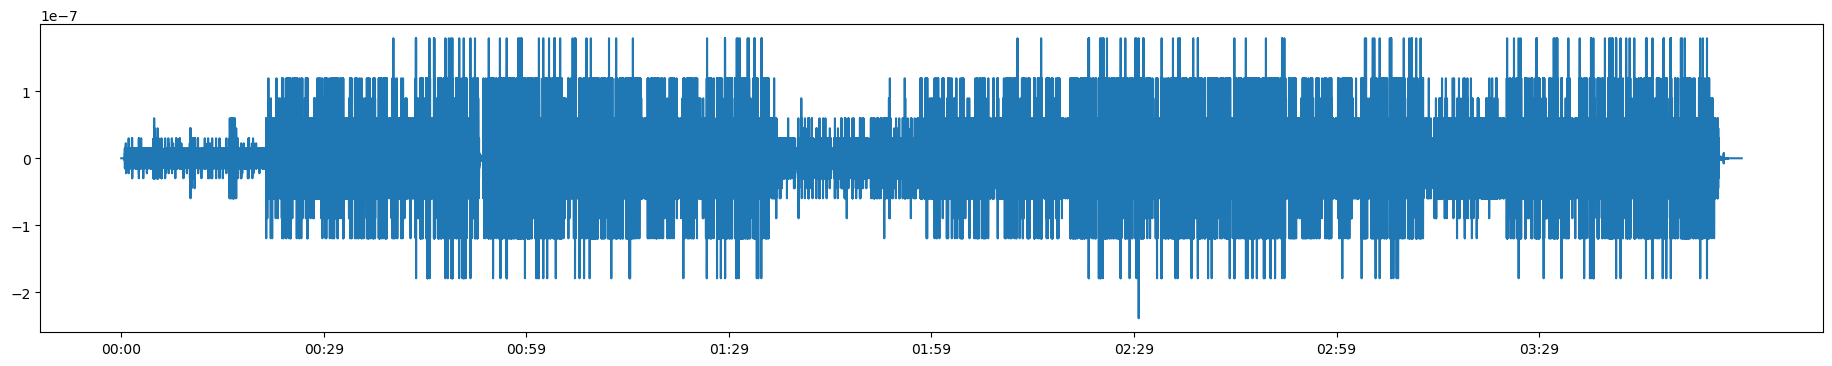

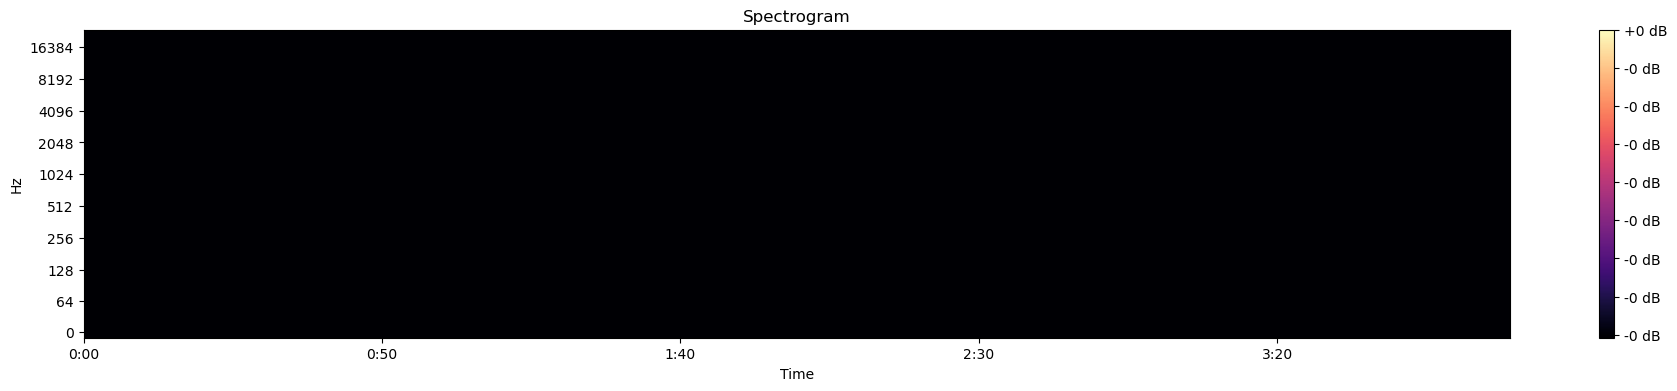

In [63]:
# This code just compares the original samples to the samples after going through FFT then iFFT to show that step isn't introducing error.

# Validate that FFT/iFFT isn't the source of any error we find
smp,sr = wrap.mp3_to_samples('samples/Bas - Tribe with J.Cole.mp3')
smp = smp[:11469824] # trim samples before FFT so sizes match after iFFT

fmag,freq = wrap.samples_to_freq(smp)
rev_smp = wrap.freq_to_samples(freq)

# save_samples_to_wav(smp-rev_smp,sr,"test_tribe.wav") # save file to manually listen
diff = smp-rev_smp
wrap.graph_samples(diff,sr,figsize=wrap.scale_fig_size(len(smp))) # graph difference
wrap.graph_spectro(wrap.samples_to_freq(diff)[0],sr,figsize=wrap.scale_fig_size(len(diff))) # graph difference spectrogram

Sample reconstruction complete -> starting FFT
FFT Complete -> differencing results
Calulations complete -> constructing charts


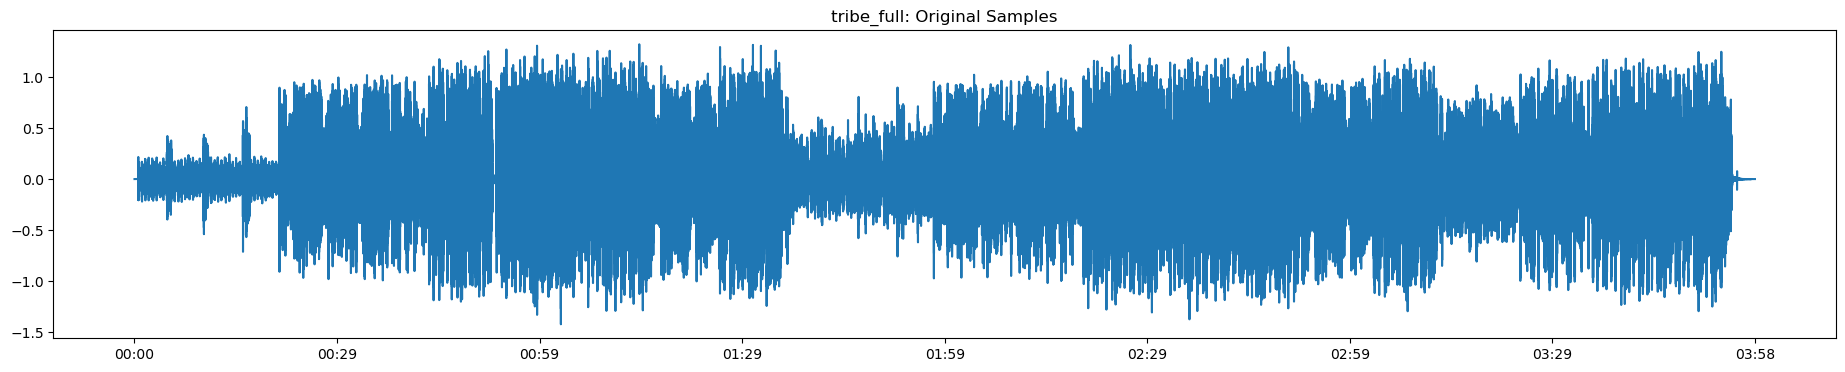

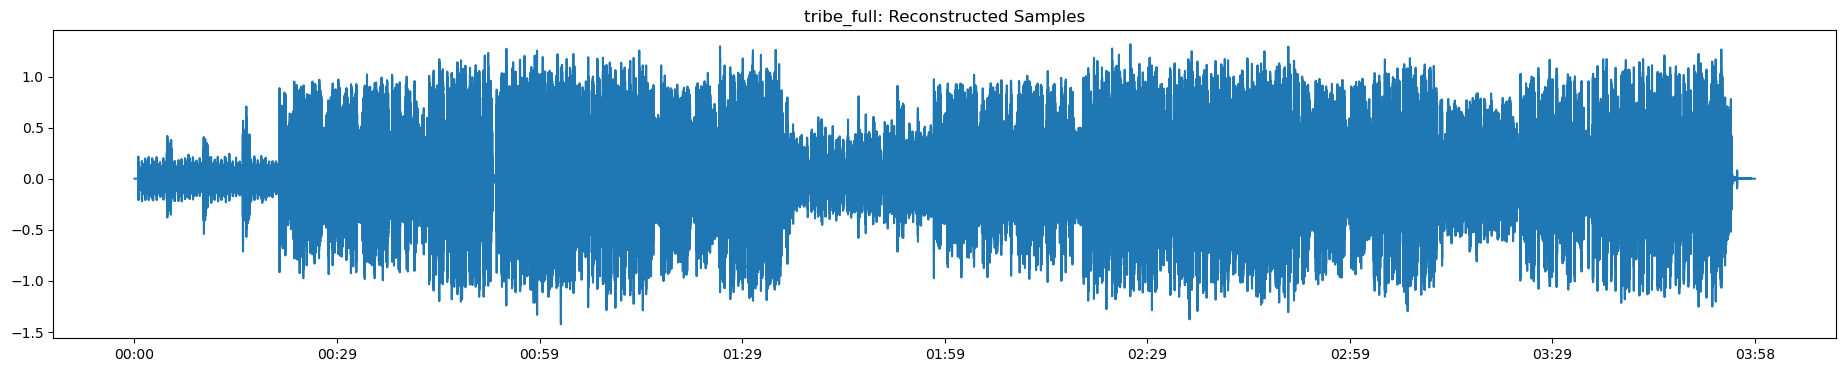

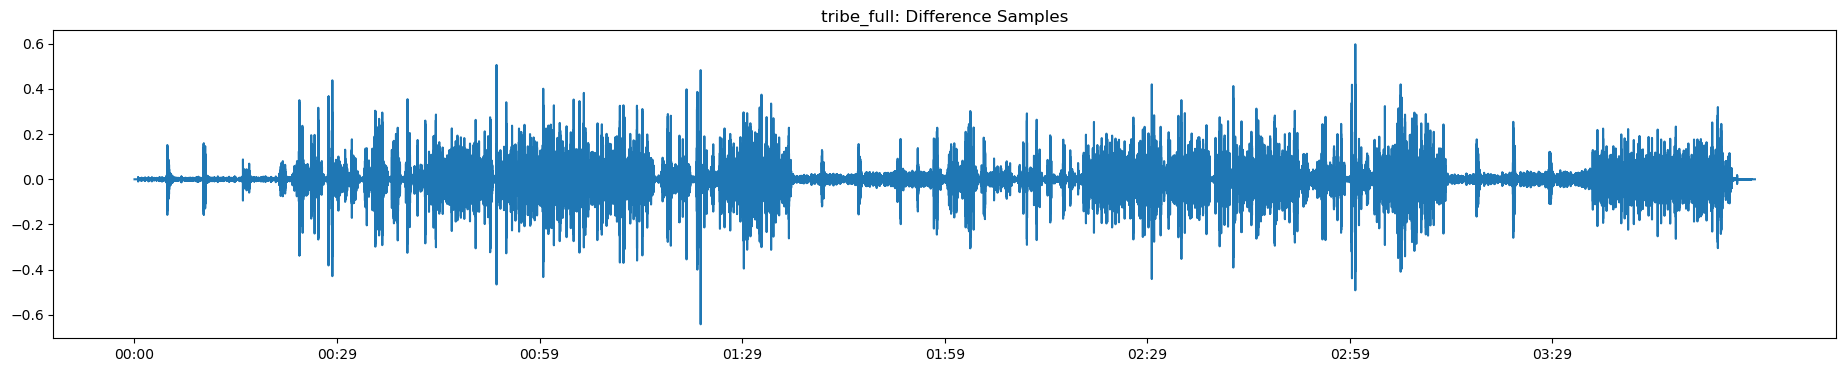

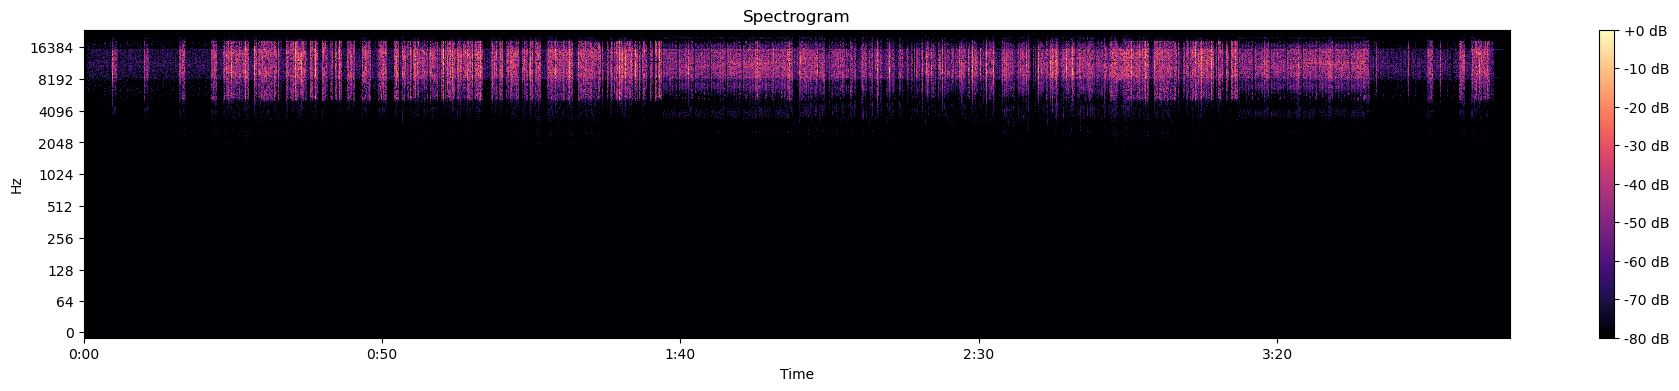

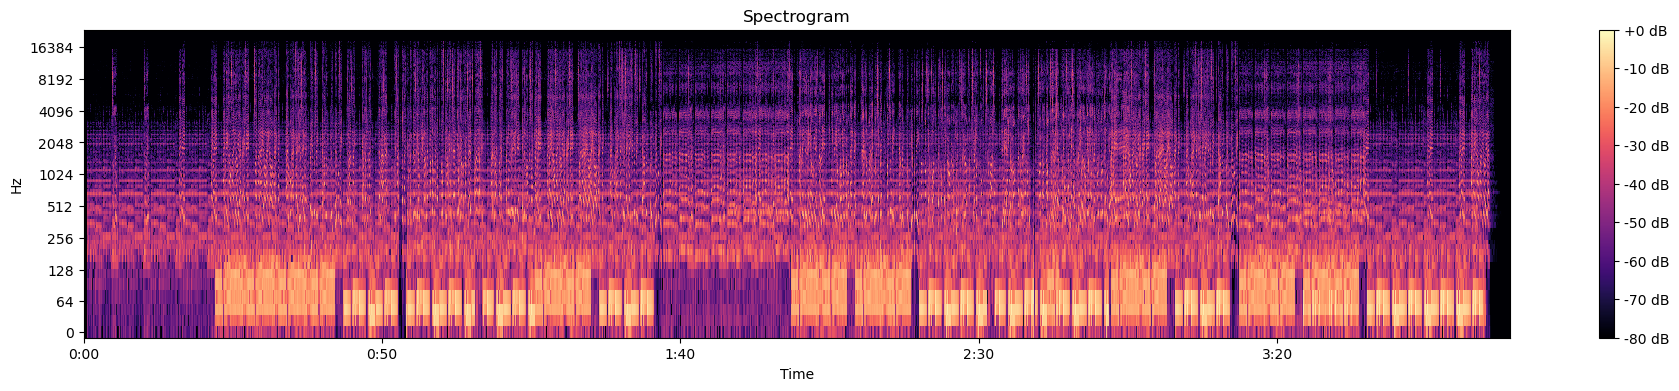

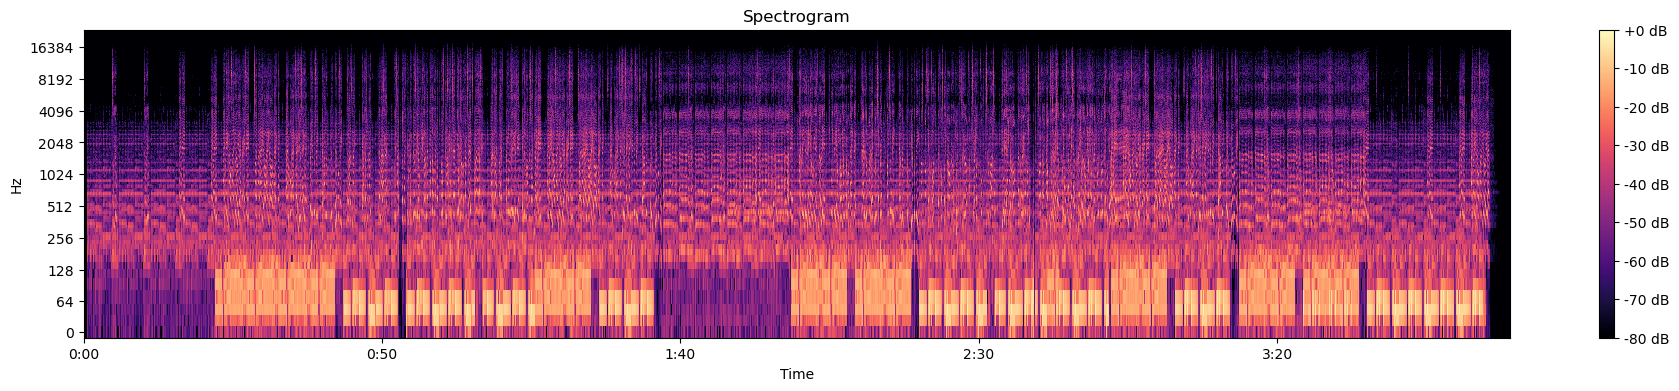

In [35]:
# This runs a full test on the provided file
wrap.full_pipeline("samples/Bas - Tribe with J.Cole.mp3", save_dir='tribe_full', testname='tribe_full')

Sample reconstruction complete -> starting FFT
FFT Complete -> differencing results
Calulations complete -> constructing charts


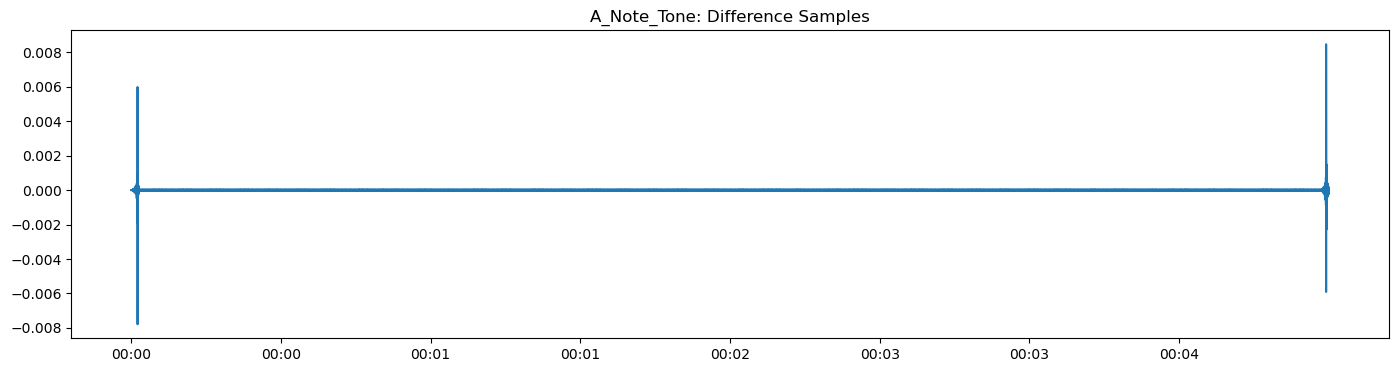

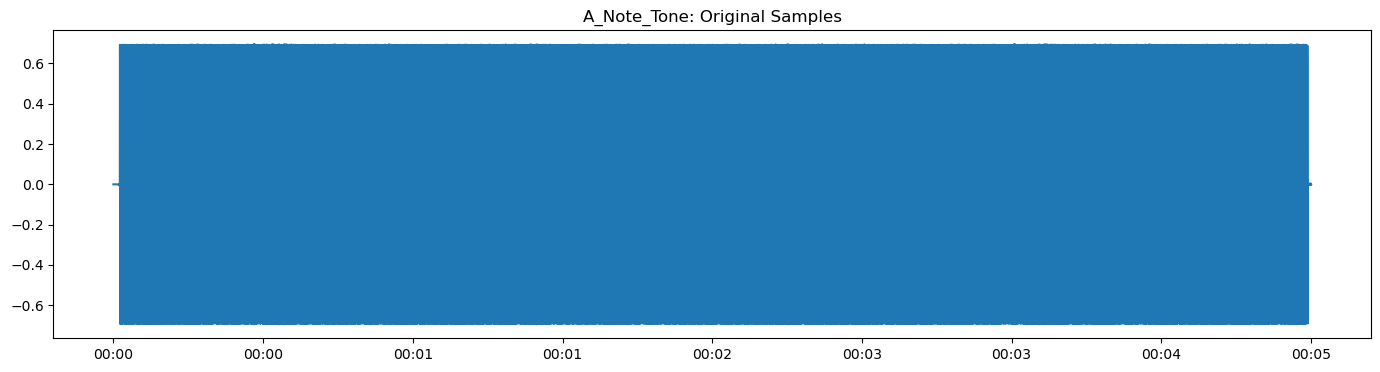

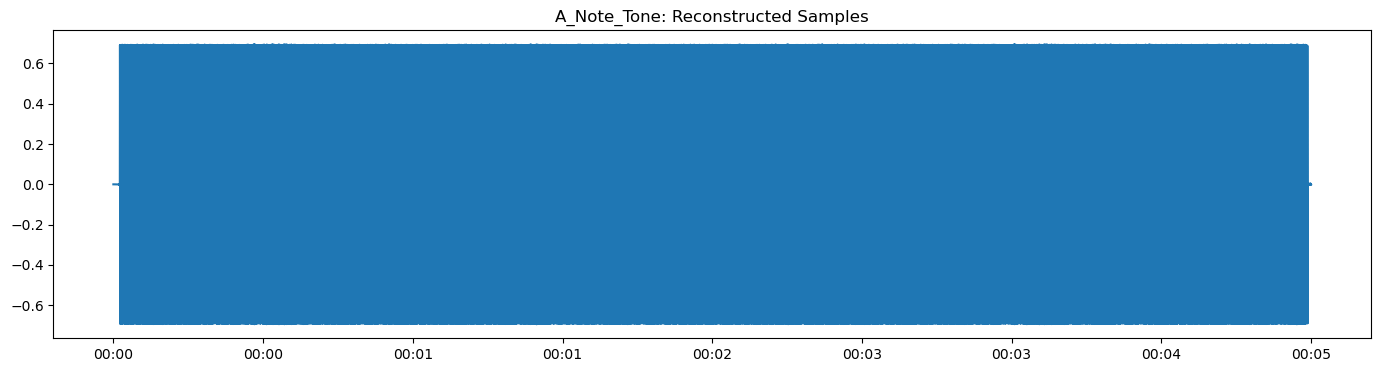

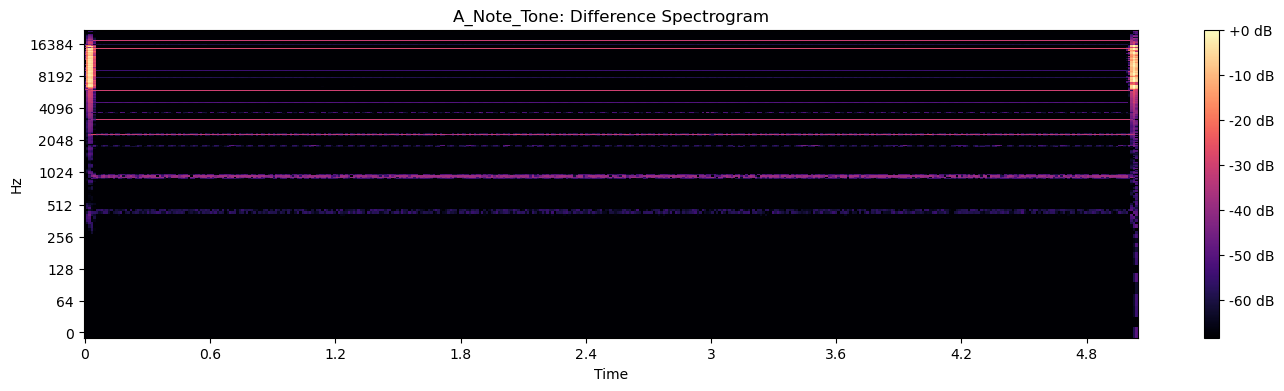

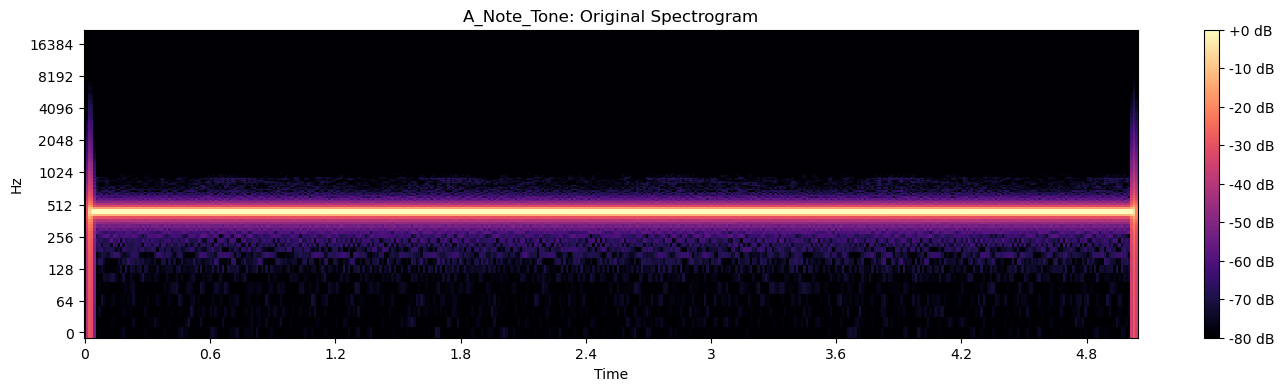

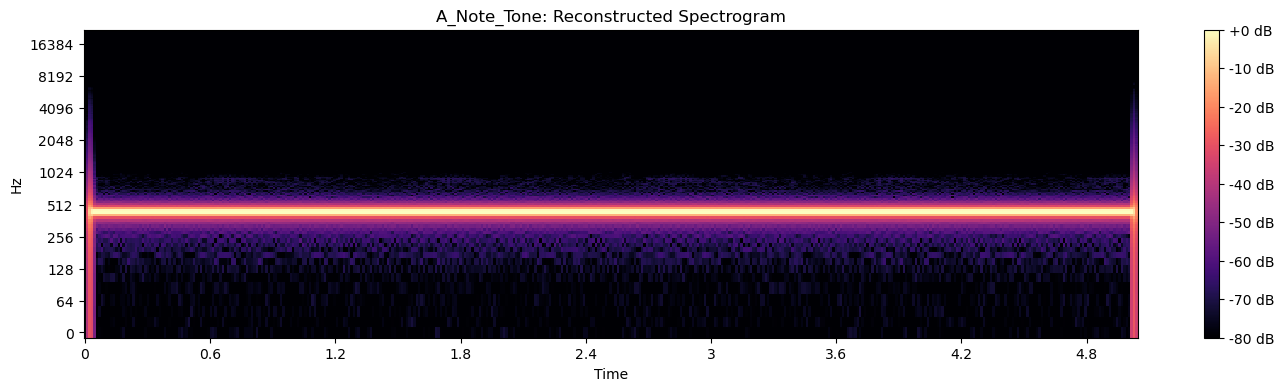

In [38]:
wrap.full_pipeline("samples/440Hz_44100Hz_16bit_05sec.mp3", save_dir='a_note', testname='A_Note_Tone')
## This one is kinda interesting, it looks like the spectrogram might be picking up on
## the "resonant error frequencies" for the cubic spline? maybe its just an artifact of the noise

Sample reconstruction complete -> starting FFT
FFT Complete -> differencing results
Calulations complete -> constructing charts


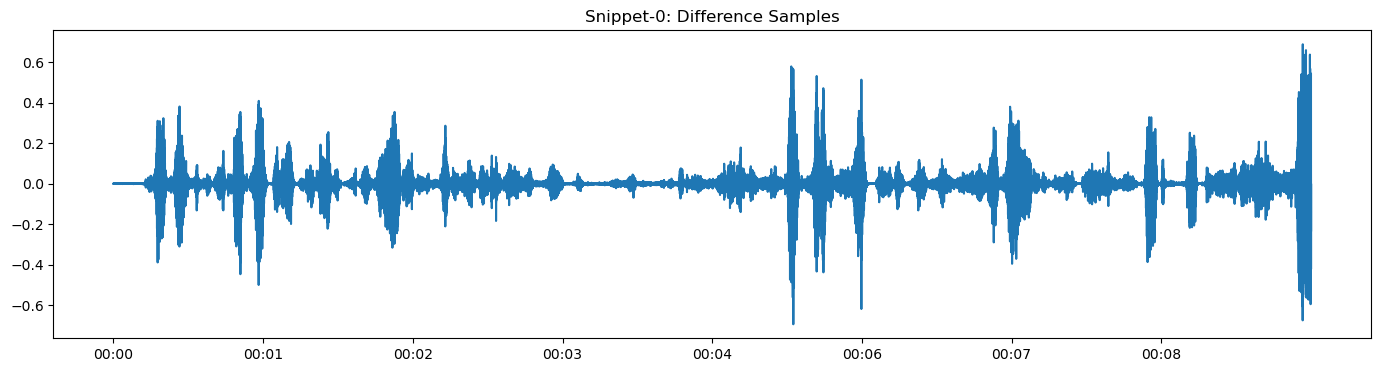

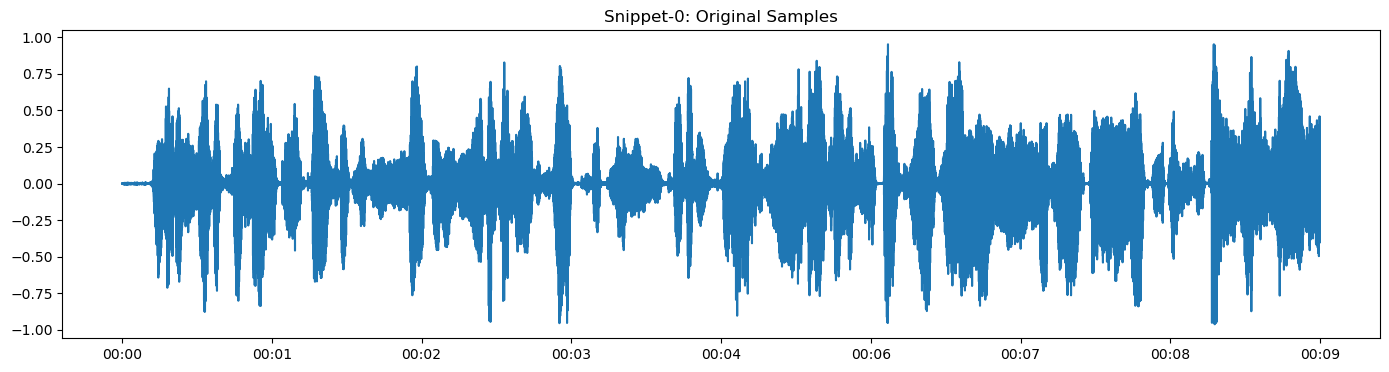

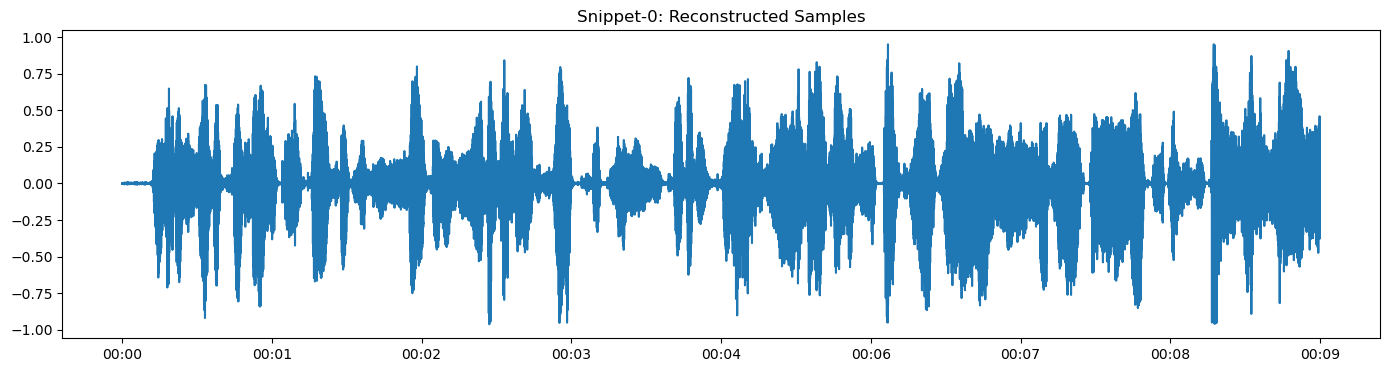

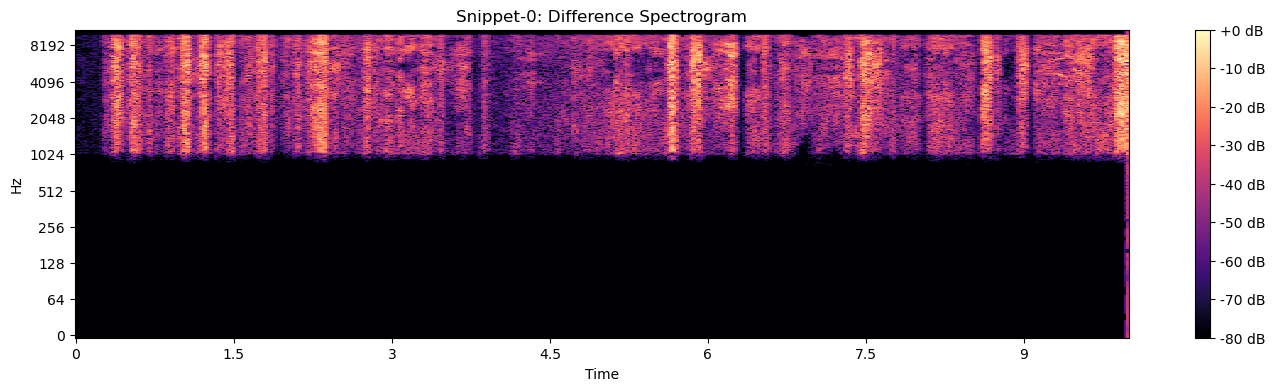

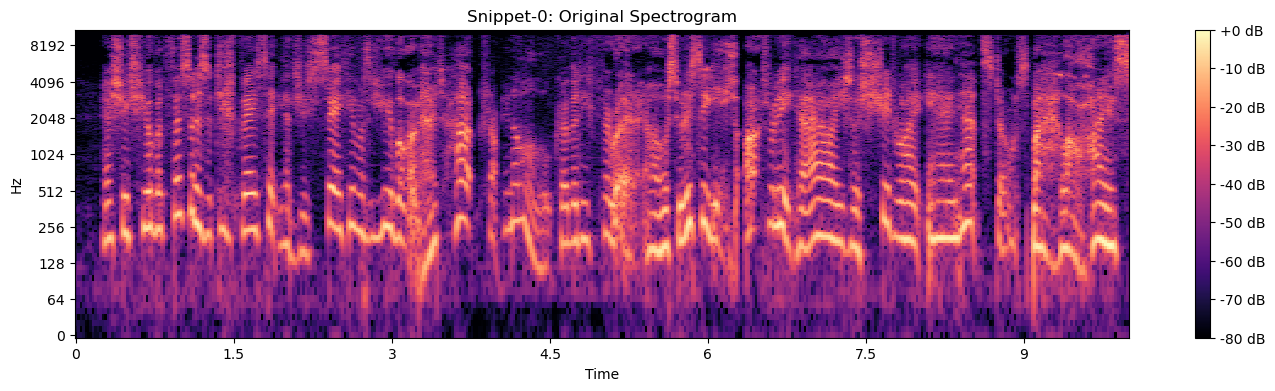

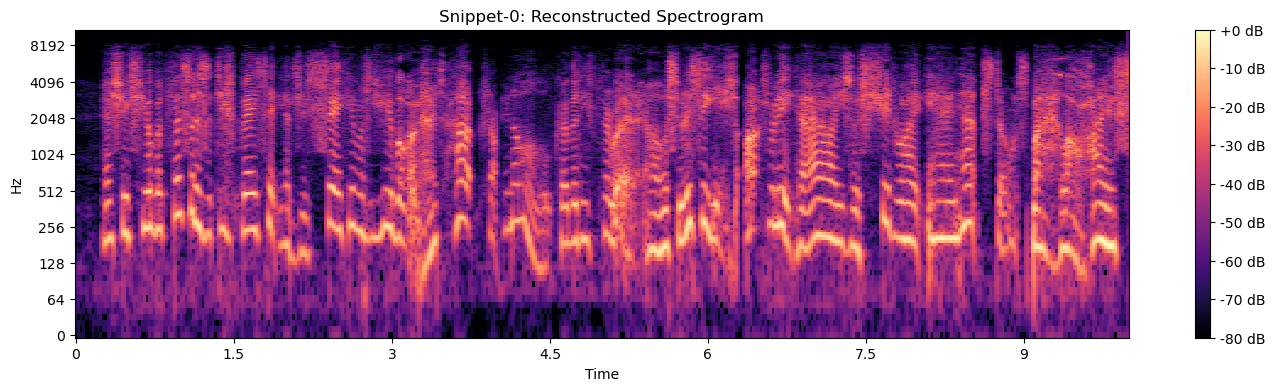

In [39]:
wrap.full_pipeline("samples/sample-0.mp3", save_dir='rand-samp0', testname='Snippet-0')

In [3]:
tribe_samps,sr = wrap.mp3_to_samples("samples/Bas - Tribe with J.Cole.mp3")
# anote,_ = mp3_to_samples("samples/440Hz_44100Hz_16bit_05sec.mp3")
tribe_samps = tribe_samps[:len(tribe_samps)//32]

In [4]:
hlv_trb = wrap.remove_half_samples(tribe_samps)
spl = wrap.get_interp_fun(hlv_trb) # cubic interpolation of reduced sample set
reconstructed = wrap.interp_odd_samples(hlv_trb,spl,len(tribe_samps))

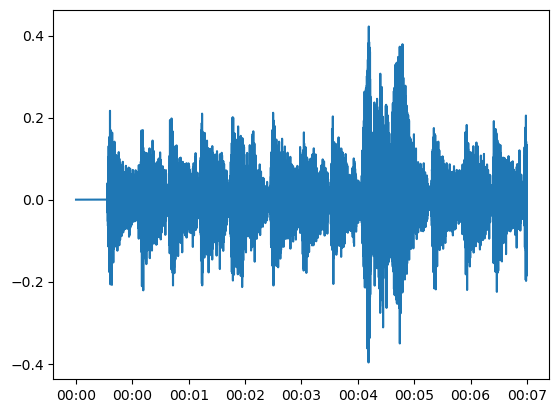

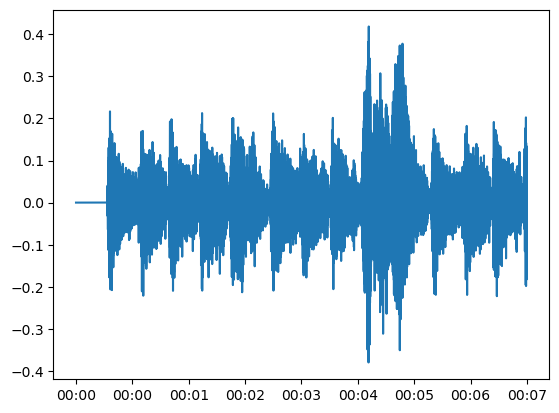

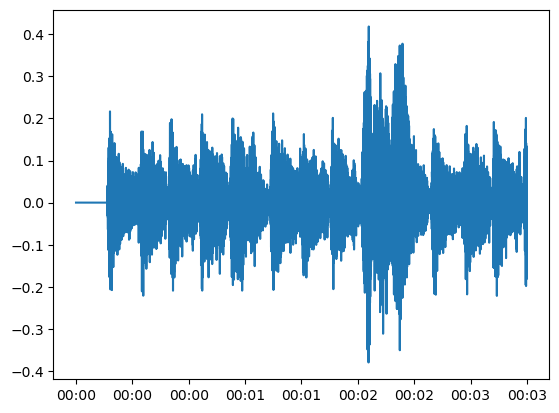

In [59]:
wrap.graph_samples(tribe_samps, sr)
wrap.graph_samples(reconstructed, sr)
wrap.graph_samples(hlv_trb, sr)

In [7]:
freq_recon,freq_recon_ = wrap.samples_to_freq(reconstructed)
freq_orig,freq_orig_ = wrap.samples_to_freq(tribe_samps)

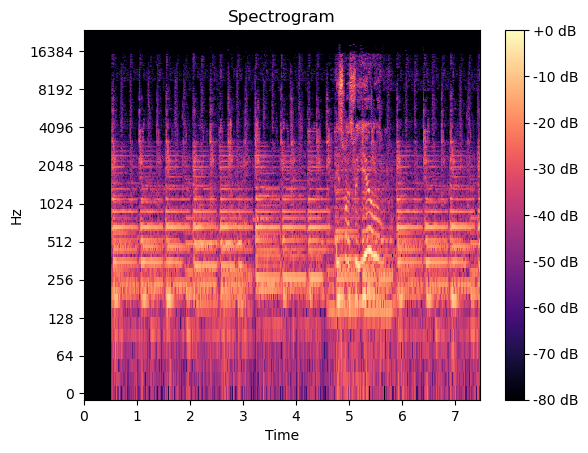

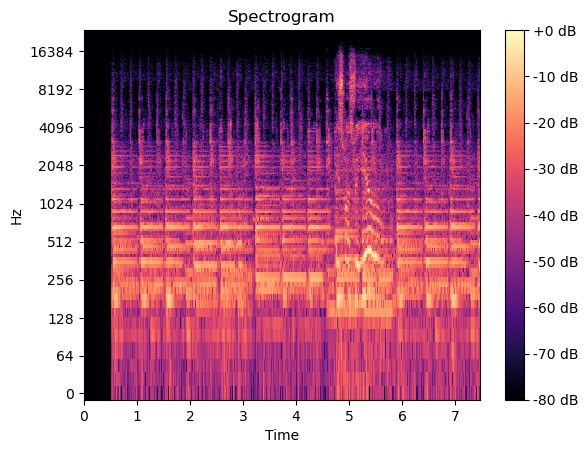

In [8]:
wrap.graph_spectro(freq_orig,sr)
wrap.graph_spectro(freq_recon,sr)

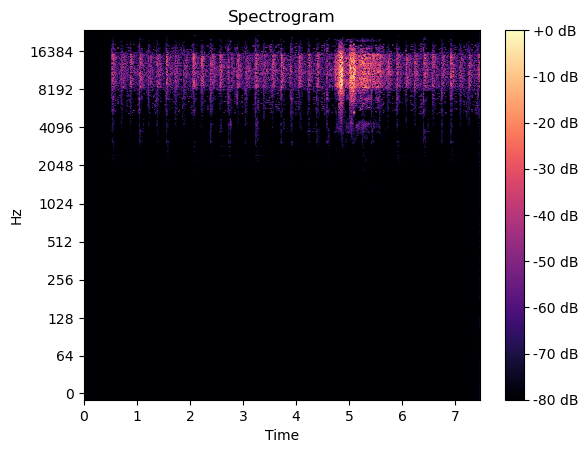

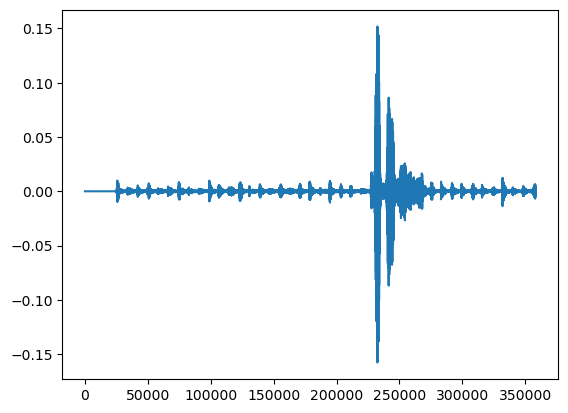

In [9]:
diff_ = freq_orig_-freq_recon_
diff = freq_orig-freq_recon
wrap.graph_spectro(diff,sr)
diff_samples = wrap.freq_to_samples(diff_)
plt.plot(np.arange(len(diff_samples)),diff_samples)
plt.show();

In [10]:
wrap.save_samples_to_wav(diff_samples,sr,"tribe_first32nd_diff.wav")

In [ ]:

wrap.mp3_to_samples("samples/sample-0.mp3")